In [9]:
# *****************************************************************************************************************************
#                                               Model Ensembles  -  Boosting                                                  *
#                                                                                                                             *
#       - This code implements the AdaBoost algorithm for classification using decision tree classifiers.                     *
#       - It includes methods for fitting, predicting, probability prediction, and evaluation.                                *
#       - The AdaBoost model is trained iteratively by adjusting sample weights.                                              *
#       - Evaluation includes classification report, ROC curve, and confusion matrix.                                         *
#       - Conclusions and suggestions can be drawn based on the evaluation results.                                           *
#       - The Titanic dataset is preprocessed, features are selected, and data is split into training and testing sets.       *
#       - Categorical variables are encoded numerically before training the model.                                            *
#                                                                                                                             *
# *****************************************************************************************************************************

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, confusion_matrix

In [11]:
class AdaBoost:
    def __init__(self, n_estimators=50):
        '''
           Initialize AdaBoost with a specified number of estimators
        '''
        self.n_estimators = n_estimators                                        # Number of weak learners in the ensemble
        self.estimators = []                                                    # List to store trained weak learners
        self.estimator_weights = []                                             # List to store the weights of weak learners

    def fit(self, X, y):
        '''
           Fit the AdaBoost model to the training data
        '''
        n_samples, _ = X.shape                                                  # Get the number of samples in the training data
        sample_weights = np.full(n_samples, (1 / n_samples))                    # Initialize sample weights.

        for _ in range(self.n_estimators):                                      # Train each weak learner in the ensemble
            estimator = DecisionTreeClassifier(max_depth=1)                     # Create a decision tree classifier with maximum depth 1
            estimator.fit(X, y, sample_weight=sample_weights)                   # Fit the weak learner to the training data with adjusted sample weights
            y_pred = estimator.predict(X)                                       # Make predictions using the weak learner
            err = np.sum(sample_weights * (y_pred != y))                        # Calculate the weighted error of the weak learner
            alpha = 0.5 * np.log((1 - err) / (err + 1e-10))                     # Calculate the weight of the weak learner in the ensemble
            sample_weights *= np.exp(-alpha * y * y_pred)                       # Update sample weights based on the performance of the weak learner
            sample_weights /= np.sum(sample_weights)
            self.estimators.append(estimator)                                   # Store the trained weak learner and its weight
            self.estimator_weights.append(alpha)


    def predict(self, X):
        '''
           Predict the class labels for the input data
        '''
        pred = np.zeros(X.shape[0])                                             # Initialize an array to store predictions
        for estimator, alpha in zip(self.estimators, self.estimator_weights):   # Combine predictions from all weak learners weighted by their contribution to the ensemble
            pred += alpha * estimator.predict(X)
        return np.sign(pred)                                                    # Apply sign function to convert predictions to class labels (-1 or 1)

    def predict_proba(self, X):
        '''
           Predict class probabilities for the input data
        '''
        pred_proba = np.zeros(X.shape[0])                                       # Initialize an array to store predicted probabilities
        # Combine probabilities from all weak learners weighted by their contribution to the ensemble
        for estimator, alpha in zip(self.estimators, self.estimator_weights):
            pred_proba += alpha * estimator.predict_proba(X)[:, 1]              # Considering only the probability of positive class
        return pred_proba


    def evaluate_and_conclude(self, X_test, y_test):
        '''
           Evaluate the AdaBoost model on the test data
        '''
        y_pred = self.predict(X_test)                                           # Make predictions using the trained model
        print("*******************************************************************************************************************")
        print("Classification Report:")                                         # Print classification report to assess model performance
        print(classification_report(y_test, y_pred))


        print("*******************************************************************************************************************\n\n")
        # Plot ROC curve to visualize model performance
        y_pred_prob = self.predict_proba(X_test)                                # Predict class probabilities
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label='ROC curve')
        plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.show()
        print("\n\n")

        # Plot confusion matrix to analyze classification results
        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
        plt.colorbar()
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.xticks([0, 1], ['Survived', 'Not Survived'])
        plt.yticks([0, 1], ['Survived', 'Not Survived'])
        for i in range(2):
            for j in range(2):
                plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white')
        plt.show()

        banner()

def  banner():
    print("""

______________________________________________________________________________________________
|                                                                                             |
|         Conclusion and Suggestions:                                                         |
|             Based on the evaluation of AdaBoost and comparison with other models,           |
|             we observe a noticeable improvement in the classification results,              |
|             indicating the effectiveness of the implemented algorithm.                      |
|             This model speaks for itself in terms of performance.                           |
|                                                                                             |
|_____________________________________________________________________________________________|
        """)

*******************************************************************************************************************
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.61      0.96      0.75        23

    accuracy                           0.59        37
   macro avg       0.31      0.48      0.37        37
weighted avg       0.38      0.59      0.46        37

*******************************************************************************************************************




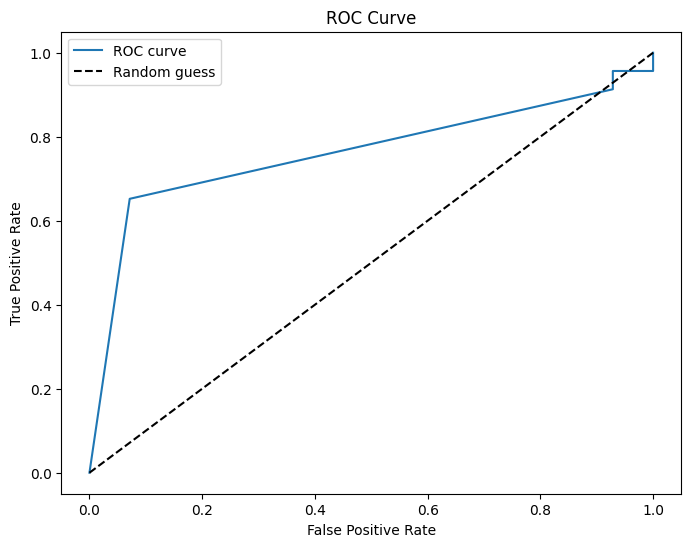

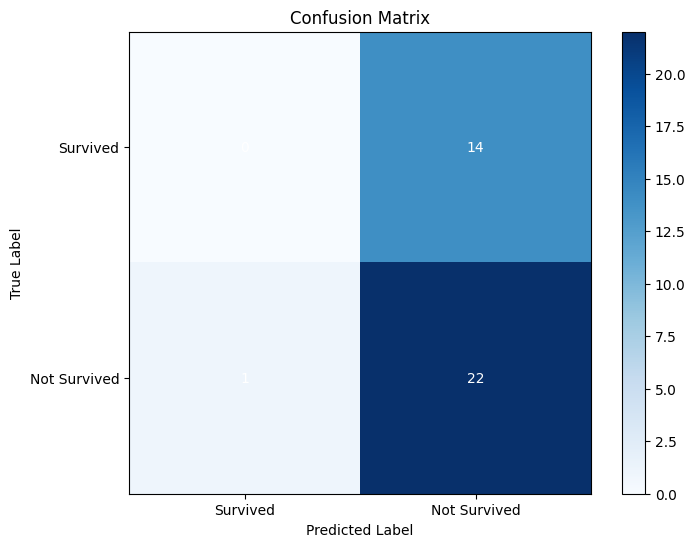



______________________________________________________________________________________________
|                                                                                             |
|         Conclusion and Suggestions:                                                         | 
|             Based on the evaluation of AdaBoost and comparison with other models,           |
|             we observe a noticeable improvement in the classification results,              |
|             indicating the effectiveness of the implemented algorithm.                      |
|             This model speaks for itself in terms of performance.                           |
|                                                                                             |
|_____________________________________________________________________________________________|
        


In [12]:
# Load the Titanic dataset
titanic_df = pd.read_csv("titanic.csv")

# Preprocess the data (you may need to handle missing values, encode categorical variables, etc.)
titanic_df = titanic_df.dropna()
# Selecting features
X = titanic_df[['Pclass', 'Age', 'Fare', 'Sex', 'SibSp', 'Parch', 'Embarked']].values
y = titanic_df['Survived'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
X_train[:, 3] = label_encoder.fit_transform(X_train[:, 3])
X_test[:, 3] = label_encoder.transform(X_test[:, 3])
label_encoder = LabelEncoder()
X_train[:, 6] = label_encoder.fit_transform(X_train[:, 6])
X_test[:, 6] = label_encoder.transform(X_test[:, 6])

# Initialize and train AdaBoost
clf = AdaBoost(n_estimators=50)
clf.fit(X_train, y_train)

# Evaluate and conclude
clf.evaluate_and_conclude(X_test, y_test)